In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Функции

In [2]:
def data_load():
    df = pd.read_excel('/Users/nkt1lyn/coef_opr_actions.xlsx')
    return df

In [3]:
def data_shape(df, date1, date2):
    df = df.loc[(df['Time'] >= date1) & (df['Time'] <= date2)]
    return df

In [4]:
def diff_diagram(level_df, xlabel, title):
    plt.figure(figsize=(10, 7))

    bar1 = plt.bar(np.arange(len(level_df['Период'])), level_df['Отклонение от BL White'], color='white', edgecolor = "black", alpha=0.7, label='Белые дни')
    bar2 = plt.bar(np.arange(len(level_df['Период'])), level_df['Отклонение от BL Black'], color='black', edgecolor = "black", alpha=0.7, label='Черные дни')

    for i, (val1, val2) in enumerate(zip(level_df['Отклонение от BL White'], level_df['Отклонение от BL Black'])):
        plt.text(i, val1, f"{val1:.2f}%", ha='center', va='bottom' if val1 >= 0 else 'top', fontsize=9, color='black')
        plt.text(i, val2, f"{val2:.2f}%", ha='center', va='bottom' if val2 >= 0 else 'top', fontsize=9, color='black')

    plt.axhline(y=0, color='black')
    plt.xlabel(xlabel)
    plt.ylabel('Отклонение от базового уровня, %')
    plt.title(title)
    plt.xticks(np.arange(len(level_df['Период'])), level_df['Период'])
    plt.legend(loc='lower left')
    plt.show()


In [5]:
def day_cat(df):
    df['Категория дня'] = np.where((df['Var1'] >= mean - std) & (df['Var1'] <= mean + std), 'White', 'Black').astype(str)
    return df


In [6]:
def quarter_label(df, year_col=None):
    if year_col is None:
        df['Период'] = np.where((df['Time'].dt.month >= 1) & (df['Time'].dt.month <= 3), '1-й квартал',
                                np.where((df['Time'].dt.month >= 4) & (df['Time'].dt.month <= 6), '2-й квартал',
                                         np.where((df['Time'].dt.month >= 7) & (df['Time'].dt.month <= 9), '3-й квартал', '4-й квартал')))
    else:
        df['Год'] = df['Time'].dt.year
        df['Период'] = np.where((df['Time'].dt.month >= 1) & (df['Time'].dt.month <= 3), '1-й квартал ' + df['Год'].astype(str),
                                np.where((df['Time'].dt.month >= 4) & (df['Time'].dt.month <= 6), '2-й квартал ' + df['Год'].astype(str),
                                         np.where((df['Time'].dt.month >= 7) & (df['Time'].dt.month <= 9), '3-й квартал ' + df['Год'].astype(str), '4-й квартал ' + df['Год'].astype(str))))
        df.drop(columns=['Год'], inplace=True)
    return df


In [7]:
def season_label(df, year_col=None):
    if year_col is None:
        df['Период'] = np.where((df['Time'].dt.month >= 3) & (df['Time'].dt.month <= 5), 'Весна',
                                np.where((df['Time'].dt.month >= 6) & (df['Time'].dt.month <= 8), 'Лето',
                                         np.where((df['Time'].dt.month >= 9) & (df['Time'].dt.month <= 11), 'Осень', 'Зима')))
    else:
        df['Год'] = df[year_col].dt.year
        df['Период'] = np.where((df[year_col].dt.month >= 3) & (df[year_col].dt.month <= 5), 'Весна ' + df['Год'].astype(str),
                                np.where((df[year_col].dt.month >= 6) & (df[year_col].dt.month <= 8), 'Лето ' + df['Год'].astype(str),
                                         np.where((df[year_col].dt.month >= 9) & (df[year_col].dt.month <= 11), 'Осень ' + df['Год'].astype(str), 'Зима ' + (df['Год'] + (df[year_col].dt.month // 12)).astype(str))))
        df.drop(columns=['Год'], inplace=True)
    return df

In [8]:
def BW_level(df, period, BaseLevel):
    period_list = []

    for p in period:
        count_white_days = np.sum((df.loc[df['Период'] == p, 'Категория дня'] == 'White'))
        count_black_days = np.sum((df.loc[df['Период'] == p, 'Категория дня'] == 'Black'))    
        p_len = count_white_days + count_black_days

        percentage_white_days = (count_white_days / p_len) * 100
        percentage_black_days = (count_black_days / p_len) * 100

        diff_1 = percentage_white_days - BaseLevel[0]
        diff_2 = percentage_black_days - BaseLevel[1]

        period_list.append({
            'Период': p,
            'Уровень белых дней': percentage_white_days,
            'Уровень черных дней': percentage_black_days,
            'Отклонение от BL White': diff_1,
            'Отклонение от BL Black': diff_2
        })

    return pd.DataFrame(period_list)

  

In [9]:
def BW_level_plot(level_df, title):
    plt.figure(figsize=(10, 7))

    bar2 = plt.bar(np.arange(len(level_df['Период'])), level_df['Уровень черных дней'], color='black', edgecolor = "black", alpha=0.7, label='Черные дни')
    bar1 = plt.bar(np.arange(len(level_df['Период'])), level_df['Уровень белых дней'], bottom=level_df['Уровень черных дней'], color='white', edgecolor = "black", alpha=0.7, label='Белые дни')

    for i, (val1, val2) in enumerate(zip(level_df['Уровень белых дней'], level_df['Уровень черных дней'])):
        plt.text(i, val1+val2, f"{val1:.2f}%", ha='center', va='bottom' if val1 >= 0 else 'top', fontsize=9, color='black')
        plt.text(i, val2, f"{val2:.2f}%", ha='center', va='bottom' if val2 >= 0 else 'top', fontsize=9, color='black')

    plt.axhline(y=0, color='black')
    plt.xlabel('Период')
    plt.ylabel('Уровень, %')
    plt.title(title)
    plt.xticks(np.arange(len(level_df['Период'])), level_df['Период'])
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Задание 1


### 1. Загрузка данных
Загрузить данные всех наблюдений с 2019-12-21 по 2023-05-03 и отбросить последний день. Создать ряд
наблюдений с 2019-12-21 по 2023-05-04.

In [10]:
df = data_load()
df = data_shape(df, '2019-12-21', '2023-03-04')

In [11]:
mean = df['Var1'].mean()
std = df['Var1'].std()

#### 2. Визуализация данных
Вывести график временного ряда, на графике добавить среднее значение по всем наблюдениям и области, кратные стандартному отклонению (Std): &#177; 1 Std,
&#177; 2 Std, &#177; 3 Std. Добавить заголовок и подписи для осей.

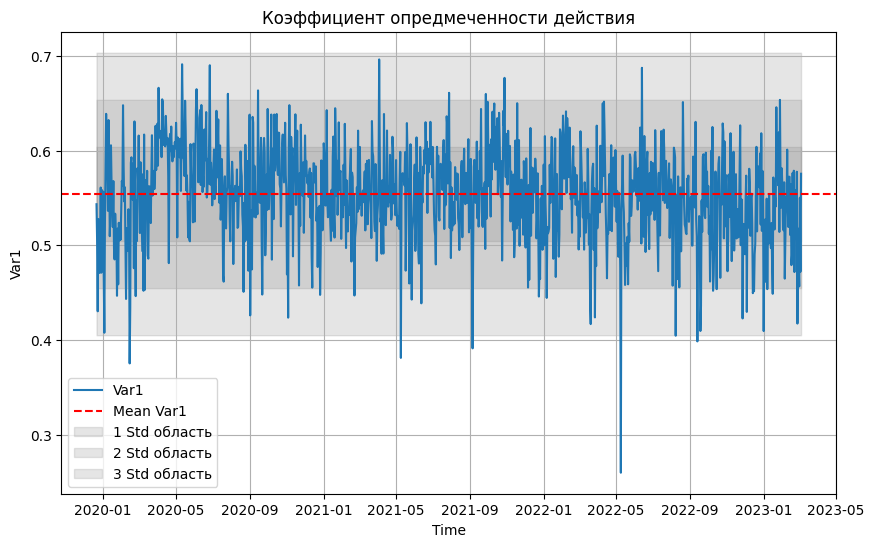

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Var1'], label='Var1')

mean_value = df['Var1'].mean()
plt.axhline(y=mean_value, color='r', linestyle='--', label='Mean Var1')

for i in range(1, 4):
    plt.fill_between(df['Time'], mean_value - i * std, mean_value + i * std,
                     color='gray', alpha=0.2, label=f'{i} Std область')

plt.xlabel('Time')
plt.ylabel('Var1')
plt.title('Коэффициент опредмеченности действия')
plt.legend()
plt.grid(True)
plt.show()

### 3. Работа с данными
#### 3.1 Заполнить пропуски ('missing') в таблице:

In [13]:
df['Std'] = np.select(
    [(df['Var1'] >= mean - std) & (df['Var1'] <= mean + std), #Std1
     ((df['Var1'] >= mean - 2 * std) & (df['Var1'] < mean - std)) | ((df['Var1'] > mean + std) & (df['Var1'] <= mean + 2 * std)),
     ((df['Var1'] >= mean - 3 * std) & (df['Var1'] < mean - 2 * std)) | ((df['Var1'] > mean + 2 * std) & (df['Var1'] <= mean + 3 * std)),
     (df['Var1'] < mean - 3 * std) | (df['Var1'] > mean + 3 * std)],
    ['+-1Std', '+-2Std', '+-3Std', '> +-3Std'],
    default='Undefined'
)

df['Std'].value_counts()

Std
+-1Std      831
+-2Std      287
+-3Std       46
> +-3Std      6
Name: count, dtype: int64

In [14]:
Std1 = df.loc[df['Std'] == '+-1Std', 'Var1']
Std2 = df.loc[df['Std'] == '+-2Std', 'Var1']
Std3 = df.loc[df['Std'] == '+-3Std', 'Var1']
More_Std3 = df.loc[df['Std'] == '> +-3Std', 'Var1']

percentage_1_std = (len(Std1) / len(df['Var1'])) * 100
percentage_2_std = (len(Std2) / len(df['Var1'])) * 100
percentage_3_std = (len(Std3) / len(df['Var1'])) * 100
percentage_more_3_std = (len(More_Std3) / len(df['Var1'])) * 100

percentage_1_std_acc = (len(Std1) / len(df['Var1'])) * 100
percentage_2_std_acc = ((len(Std1) + len(Std2)) / len(df['Var1'])) * 100
percentage_3_std_acc = ((len(Std1) + len(Std2) + len(Std3)) / len(df['Var1'])) * 100
percentage_more_3_std_acc = ((len(Std1) + len(Std2) + len(Std3) + len(More_Std3))/ len(df['Var1'])) * 100

In [15]:
column_names = ['Области', 'Количество данных', 'В процентах', 'Накопление по областям(%)']
areas = ['1 Std', '2 Std', '3 Std', '> 3 Std', 'Всего']
data_count = [len(Std1), len(Std2), len(Std3), len(More_Std3), len(df)]
data_percentage = [percentage_1_std, percentage_2_std, percentage_3_std, percentage_more_3_std, 100]
perc = [percentage_1_std_acc, percentage_2_std_acc, percentage_3_std_acc, percentage_more_3_std_acc, '']


data_areas = pd.DataFrame(columns=column_names)
data_areas['Области'] = areas
data_areas['Количество данных'] = data_count
data_areas['В процентах'] = data_percentage
data_areas['Накопление по областям(%)'] = perc

data_areas

,Области,Количество данных,В процентах,Накопление по областям(%)
0,1 Std,831,71.025641,71.025641
1,2 Std,287,24.529915,95.555556
2,3 Std,46,3.931624,99.487179
3,> 3 Std,6,0.512821,100.0
4,Всего,1170,100.000000,


#### 3.2 Базовый уровень

Определить базовый уровень по формуле:

BaseLevel = вектор-строка из двух компонент (BL1, BL2), где

BL1 = 100 * "Кол-во данных в области 1 Std" / "Общее кол-во данных" 

BL2 = 100 * "Кол-во данных в области > 1 Std" / "Общее кол-во данных"

In [16]:
BL1 = 100 * len(Std1) / len(df)
BL2 = 100 * (len(df) - len(Std1)) / len(df)

BaseLevel = [BL1, BL2]
BaseLevel

[71.02564102564102, 28.974358974358974]

#### 3.3 Категоризация данных
Ввести категории "Белые дни" и "Черные дни". В категорию "Белые дни" попадают дни, в которые значения временного ряда не больше 1 Std, а в категорию "Черные дни" - все остальные дни.

Выбрать временные интервалы:

"Весна" - с 01 марта по 31 мая;

"Лето" - с 01 июня по 31 августа;

"Осень" - с 01 сентября по 30 ноября;

"Зима" - с 01 декабря по 28 февраля;

Определить уровни белых и черных дней (по аналогии с базовым уровнем) по сезонам суммарно за все годы наблюдений (т.е. "Весна" = "Весна 2020" + "Весна 2021" + "Весна 2022", и т.д.).

In [17]:
df = data_load()
df = data_shape(df, '2020-03-01', '2023-02-28')

In [18]:
df = day_cat(df)
df = season_label(df)

In [19]:
df

,Time,Var1,Категория дня,Период
71,2020-03-01,0.558665,White,Весна
72,2020-03-02,0.512968,White,Весна
73,2020-03-03,0.587722,White,Весна
74,2020-03-04,0.557022,White,Весна
75,2020-03-05,0.527966,White,Весна
...,...,...,...,...
1161,2023-02-24,0.506522,White,Зима
1162,2023-02-25,0.577663,White,Зима
1163,2023-02-26,0.417407,Black,Зима
1164,2023-02-27,0.517620,White,Зима


In [20]:
df['Категория дня'].value_counts()

Категория дня
White    784
Black    311
Name: count, dtype: int64

In [21]:
df['Период'].value_counts()

Период
Весна    276
Лето     276
Осень    273
Зима     270
Name: count, dtype: int64

In [22]:
seasons = ['Зима', 'Весна', 'Лето', 'Осень']
seasons_level_df = BW_level(df, seasons, BaseLevel)
seasons_level_df

,Период,Уровень белых дней,Уровень черных дней,Отклонение от BL White,Отклонение от BL Black
0,Зима,72.962963,27.037037,1.937322,-1.937322
1,Весна,69.927536,30.072464,-1.098105,1.098105
2,Лето,77.898551,22.101449,6.872910,-6.872910
3,Осень,65.567766,34.432234,-5.457875,5.457875


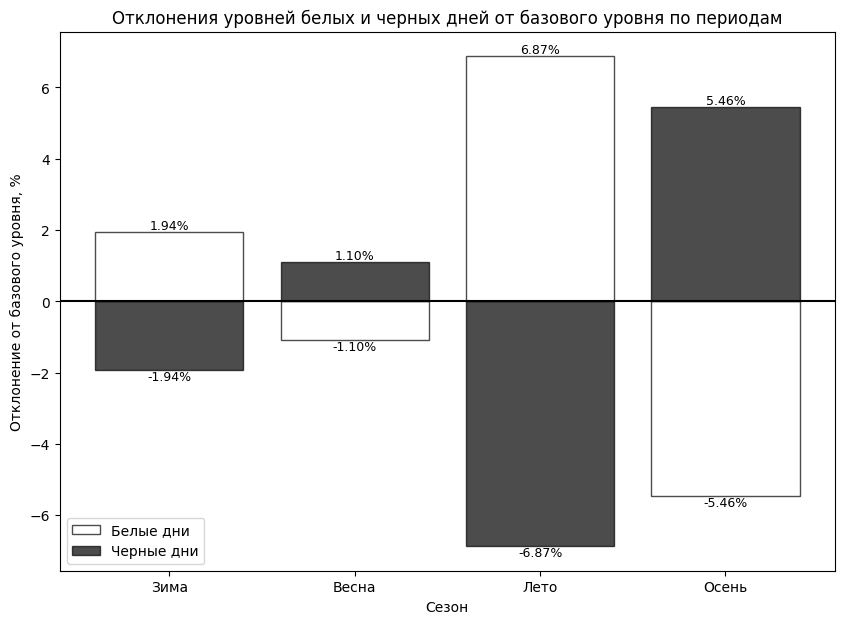

In [23]:
xlabel = 'Сезон'
title = 'Отклонения уровней белых и черных дней от базового уровня по периодам'

diff_diagram(seasons_level_df, xlabel, title)

# Задание 2



#### 3.1 Агрегирование данных поквартально

Выбрать временные интервалы:

"1-й квартал" - с января по март включительно; 

"2-й квартал" - с апреля по июнь включительно; 

"3-й квартал" - с июля по сентябрь включительно; 

"4-й квартал" - с октября по декабрь включительно;

Определить уровни белых и черных дней (по аналогии с базовым уровнем) по кварталам суммарно за все годы наблюдений (т.е. "1-й Квартал" = "1-й квартал 2020" + "1-й квартал 2021" + "1-й квартал 2022", и т.д.).

In [24]:
df = data_load()
df = data_shape(df, '2020-01-01', '2022-12-31')
df = day_cat(df)
df = quarter_label(df)
df

,Time,Var1,Категория дня,Период
11,2020-01-01,0.556766,White,1-й квартал
12,2020-01-02,0.469028,Black,1-й квартал
13,2020-01-03,0.407727,Black,1-й квартал
14,2020-01-04,0.524469,White,1-й квартал
15,2020-01-05,0.581420,White,1-й квартал
...,...,...,...,...
1102,2022-12-27,0.521956,White,4-й квартал
1103,2022-12-28,0.618273,Black,4-й квартал
1104,2022-12-29,0.515231,White,4-й квартал
1105,2022-12-30,0.578526,White,4-й квартал


In [25]:
df['Период'].value_counts()

Период
3-й квартал    276
4-й квартал    276
2-й квартал    273
1-й квартал    271
Name: count, dtype: int64

In [26]:
quarter = ['1-й квартал', '2-й квартал', '3-й квартал', '4-й квартал']
quarter_level_df = BW_level(df, quarter, BaseLevel)
quarter_level_df

,Период,Уровень белых дней,Уровень черных дней,Отклонение от BL White,Отклонение от BL Black
0,1-й квартал,73.800738,26.199262,2.775097,-2.775097
1,2-й квартал,67.032967,32.967033,-3.992674,3.992674
2,3-й квартал,78.260870,21.739130,7.235229,-7.235229
3,4-й квартал,66.666667,33.333333,-4.358974,4.358974


#### 3.2 Агрегирование данных вне сезонов

Выбрать временные интервалы:

"Февраль-Апрель" - с февраля по апрель включительно;

"Май-Июль" - с мая по июль включительно;

"Август-Октябрь" - с августа по октябрь включительно;

"Ноябрь-Январь" - с ноября по январь включительно;

Определить уровни белых и черных дней (по аналогии с базовым уровнем) в межсезоньн суммарно за все годы наблюдений (т.е. "Февраль-Март" = "фев-мар" + "фев-мар 2021" + "фев-мар 2022", и т.д.).


In [27]:
df = data_load()
df = data_shape(df, '2020-02-01', '2023-01-31')
df = day_cat(df)

df['Период'] = np.where((df['Time'].dt.month >= 2) & (df['Time'].dt.month <= 4), 'Февраль-Апрель',
                      np.where((df['Time'].dt.month >= 5) & (df['Time'].dt.month <= 7), 'Май-Июль',
                               np.where((df['Time'].dt.month >= 8) & (df['Time'].dt.month <= 10), 'Август-Октябрь', 'Ноябрь-Январь')))

df

,Time,Var1,Категория дня,Период
42,2020-02-01,0.567935,White,Февраль-Апрель
43,2020-02-02,0.563229,White,Февраль-Апрель
44,2020-02-03,0.647851,Black,Февраль-Апрель
45,2020-02-04,0.582788,White,Февраль-Апрель
46,2020-02-05,0.546306,White,Февраль-Апрель
...,...,...,...,...
1133,2023-01-27,0.514090,White,Ноябрь-Январь
1134,2023-01-28,0.653494,Black,Ноябрь-Январь
1135,2023-01-29,0.565529,White,Ноябрь-Январь
1136,2023-01-30,0.539833,White,Ноябрь-Январь


In [28]:
df['Период'].value_counts()

Период
Май-Июль          276
Август-Октябрь    276
Ноябрь-Январь     276
Февраль-Апрель    268
Name: count, dtype: int64

In [29]:
out_season = ['Февраль-Апрель', 'Май-Июль', 'Август-Октябрь', 'Ноябрь-Январь']
out_season_level_df = BW_level(df, out_season, BaseLevel)
out_season_level_df

,Период,Уровень белых дней,Уровень черных дней,Отклонение от BL White,Отклонение от BL Black
0,Февраль-Апрель,70.895522,29.104478,-0.130119,0.130119
1,Май-Июль,72.101449,27.898551,1.075808,-1.075808
2,Август-Октябрь,71.376812,28.623188,0.351171,-0.351171
3,Ноябрь-Январь,70.289855,29.710145,-0.735786,0.735786


#### 3.3 Визуализация

Наглядно отобразить на столбчатой диаграмме (bar) отклонения уровней белых и черных дней от
базового уровня по кварталам и в межсезонье (2 разных диаграммы). 

Добавить обозначения, заголовок и подписи для осей.

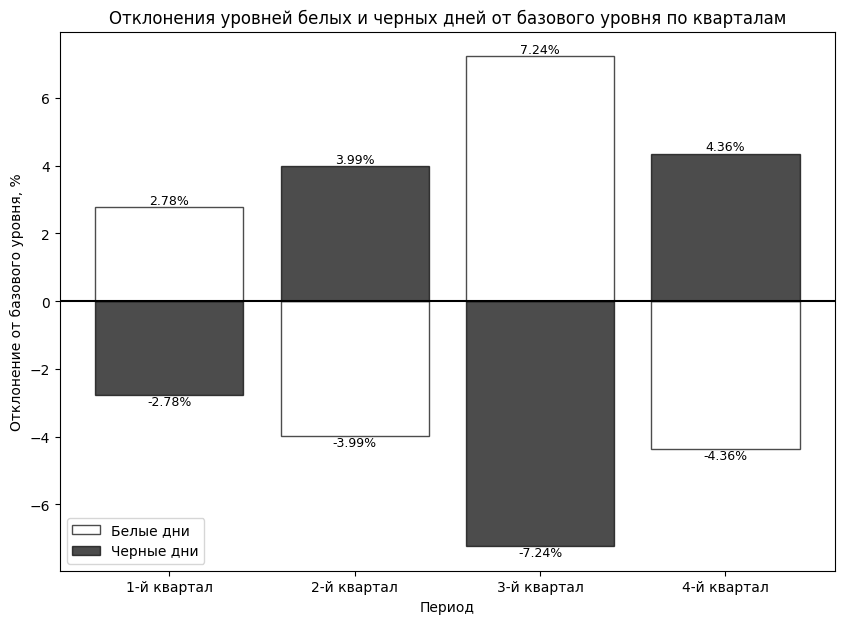

In [30]:
xlabel = 'Период'
title = 'Отклонения уровней белых и черных дней от базового уровня по кварталам'
diff_diagram(quarter_level_df, xlabel, title)

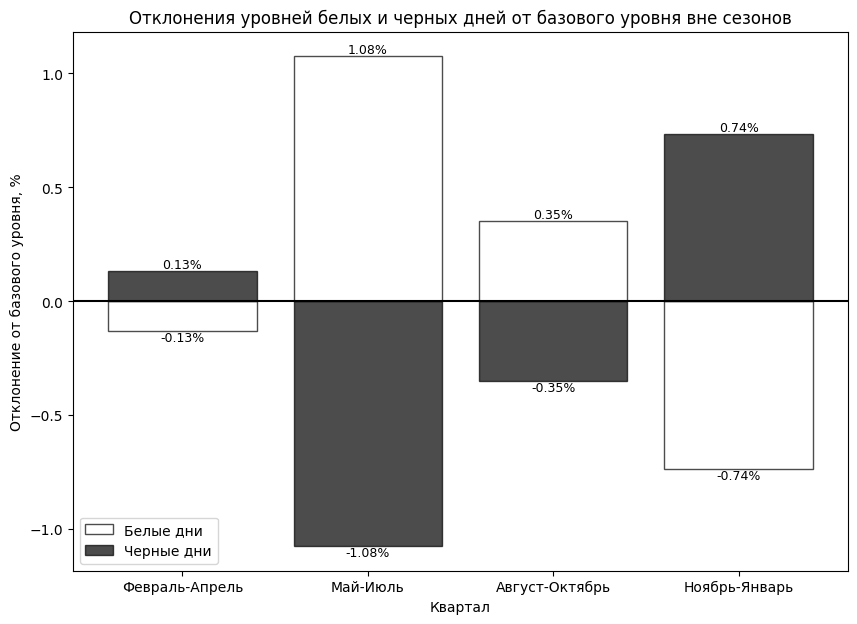

In [31]:
xlabel = 'Квартал'
title = 'Отклонения уровней белых и черных дней от базового уровня вне сезонов'
diff_diagram(out_season_level_df, xlabel, title)

# Задание 3

#### 1.1 Агрегирование сезонных данных ежегодно с 2020 года по 2023 год Выбрать временные интервалы:

- **Весна 2020**: с 1 марта 2020 года по 31 мая 2020 года;
- **Лето 2020**: с 1 июня по 31 августа 2020 года;
- **Осень 2020**: с 1 сентября по 30 ноября 2020 года;
- **Зима 2021**: с 1 декабря 2020 года по 28 февраля 2021 года;
- **Весна 2021**: с 01 марта по 31 мая 2021 года;
- **Лето 2021**: с 1 июня по 31 августа 2021 года;
- **Осень 2021**: с 1 сентября по 30 ноября 2021 года;
- **Зима 2022**: с 1 декабря 2021 года по 28 февраля 2022 года;
- **Весна 2022**: с 01 марта по 31 мая 2022 года;
- **Лето 2022**: с 1 июня по 31 августа 2022 года;
- **Осень 2022**: с 1 сентября по 30 ноября 2022 года;
- **Зима 2023**: с 1 декабря 2022 года по 28 февраля 2023 года.

Определить уровни белых и черных дней по временам года в каждом году.

In [32]:
df = data_load()
df = data_shape(df, '2020-03-01', '2023-02-28')
df = season_label(df, 'Time')
df = day_cat(df)

In [33]:
df

,Time,Var1,Период,Категория дня
71,2020-03-01,0.558665,Весна 2020,White
72,2020-03-02,0.512968,Весна 2020,White
73,2020-03-03,0.587722,Весна 2020,White
74,2020-03-04,0.557022,Весна 2020,White
75,2020-03-05,0.527966,Весна 2020,White
...,...,...,...,...
1161,2023-02-24,0.506522,Зима 2023,White
1162,2023-02-25,0.577663,Зима 2023,White
1163,2023-02-26,0.417407,Зима 2023,Black
1164,2023-02-27,0.517620,Зима 2023,White


In [34]:
df['Период'].value_counts()

Период
Весна 2020    92
Лето 2020     92
Весна 2021    92
Лето 2021     92
Весна 2022    92
Лето 2022     92
Осень 2020    91
Осень 2021    91
Осень 2022    91
Зима 2021     90
Зима 2022     90
Зима 2023     90
Name: count, dtype: int64

In [35]:
seasons = ['Весна 2020', 'Лето 2020', 'Осень 2020',
           'Зима 2021', 'Весна 2021', 'Лето 2021', 'Осень 2021',
           'Зима 2022', 'Весна 2022', 'Лето 2022', 'Осень 2022', 
           'Зима 2023'
           ]

season_level_df = BW_level(df, seasons, BaseLevel)
season_level_df

,Период,Уровень белых дней,Уровень черных дней,Отклонение от BL White,Отклонение от BL Black
0,Весна 2020,53.260870,46.739130,-17.764771,17.764771
1,Лето 2020,70.652174,29.347826,-0.373467,0.373467
2,Осень 2020,65.934066,34.065934,-5.091575,5.091575
3,Зима 2021,81.111111,18.888889,10.085470,-10.085470
4,Весна 2021,84.782609,15.217391,13.756968,-13.756968
5,Лето 2021,81.521739,18.478261,10.496098,-10.496098
6,Осень 2021,63.736264,36.263736,-7.289377,7.289377
7,Зима 2022,67.777778,32.222222,-3.247863,3.247863
8,Весна 2022,71.739130,28.260870,0.713489,-0.713489
9,Лето 2022,81.521739,18.478261,10.496098,-10.496098


#### 1.2 Агрегирование данных поквартально ежегодно с 2020 года по 2022 год Выбрать временные интервалы:

- "1-й квартал 2020" - с 1 января 2020 года по 31 марта 2020 года;
- "2-й квартал 2020" - с 1 апреля по 30 июня 2020 года;
- "3-й квартал 2020" - с 1 июля по 30 сентября 2020 года;
- "4-й квартал 2020" - с 1 октября 2020 года по 31 декабря 2020 года;
- "1-й квартал 2021" - с 1 января 2021 года по 31 марта 2021 года;
- "2-й квартал 2021" - с 1 апреля по 30 июня 2021 года;
- "3-й квартал 2021" - с 1 июля по 30 сентября 2021 года;
- "4-й квартал 2021" - с 1 октября 2021 года по 31 декабря 2021 года;
- "1-й квартал 2022" - с 1 января 2022 года по 31 марта 2022 года;
- "2-й квартал 2022" - с 1 апреля по 30 июня 2022 года;
- "3-й квартал 2022" - с 1 июля по 30 сентября 2022 года;
- "4-й квартал 2022" - с 1 октября 2022 года по 31 декабря 2022 года.

Определить уровни белых и черных дней по кварталам в каждом году.

In [36]:
df = data_load()
df = data_shape(df, '2020-01-01', '2022-12-31')
df = day_cat(df)
df = quarter_label(df, 'Time')

In [37]:
df['Период'].value_counts()

Период
3-й квартал 2020    92
4-й квартал 2020    92
3-й квартал 2021    92
4-й квартал 2021    92
3-й квартал 2022    92
4-й квартал 2022    92
1-й квартал 2020    91
2-й квартал 2020    91
2-й квартал 2021    91
2-й квартал 2022    91
1-й квартал 2021    90
1-й квартал 2022    90
Name: count, dtype: int64

In [38]:
quarters = ['1-й квартал 2020','2-й квартал 2020','3-й квартал 2020','4-й квартал 2020',
           '1-й квартал 2021','2-й квартал 2021','3-й квартал 2021','4-й квартал 2021',
           '1-й квартал 2022','2-й квартал 2022','3-й квартал 2022','4-й квартал 2022',
           ]

quarters_level_df = BW_level(df, quarters, BaseLevel)
quarters_level_df

,Период,Уровень белых дней,Уровень черных дней,Отклонение от BL White,Отклонение от BL Black
0,1-й квартал 2020,68.131868,31.868132,-2.893773,2.893773
1,2-й квартал 2020,48.351648,51.648352,-22.673993,22.673993
2,3-й квартал 2020,73.913043,26.086957,2.887402,-2.887402
3,4-й квартал 2020,70.652174,29.347826,-0.373467,0.373467
4,1-й квартал 2021,85.555556,14.444444,14.529915,-14.529915
5,2-й квартал 2021,78.021978,21.978022,6.996337,-6.996337
6,3-й квартал 2021,81.521739,18.478261,10.496098,-10.496098
7,4-й квартал 2021,63.043478,36.956522,-7.982163,7.982163
8,1-й квартал 2022,67.777778,32.222222,-3.247863,3.247863
9,2-й квартал 2022,74.725275,25.274725,3.699634,-3.699634


#### 1.3 Визуализация

Наглядно отобразить на столбчатой диаграмме (bar) уровни белых и черных дней по временам года и по
кварталам (2 разных диаграммы).

Добавить обозначения, заголовок и подписи для осей.

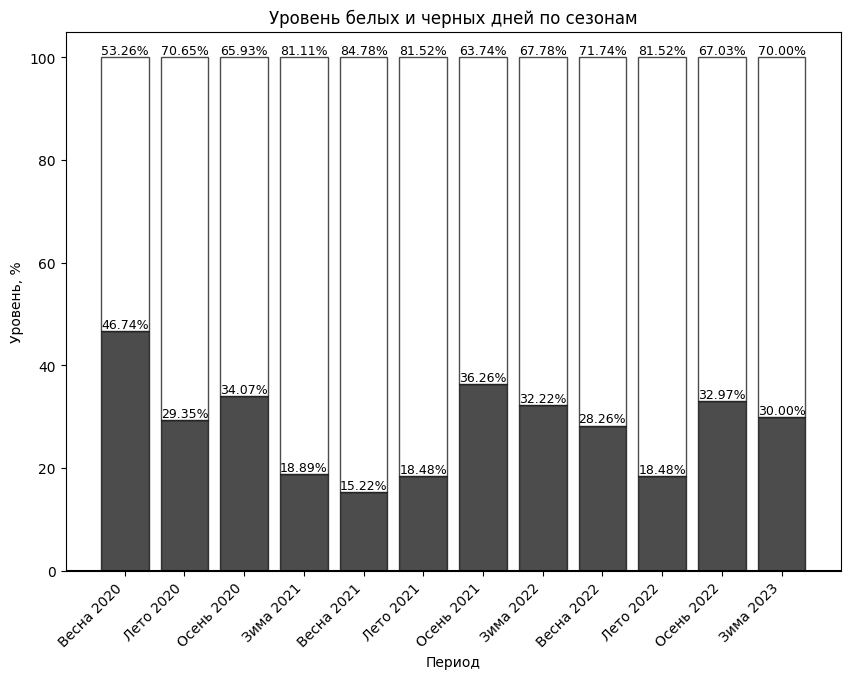

In [39]:
title = 'Уровень белых и черных дней по сезонам'
BW_level_plot(season_level_df, title)

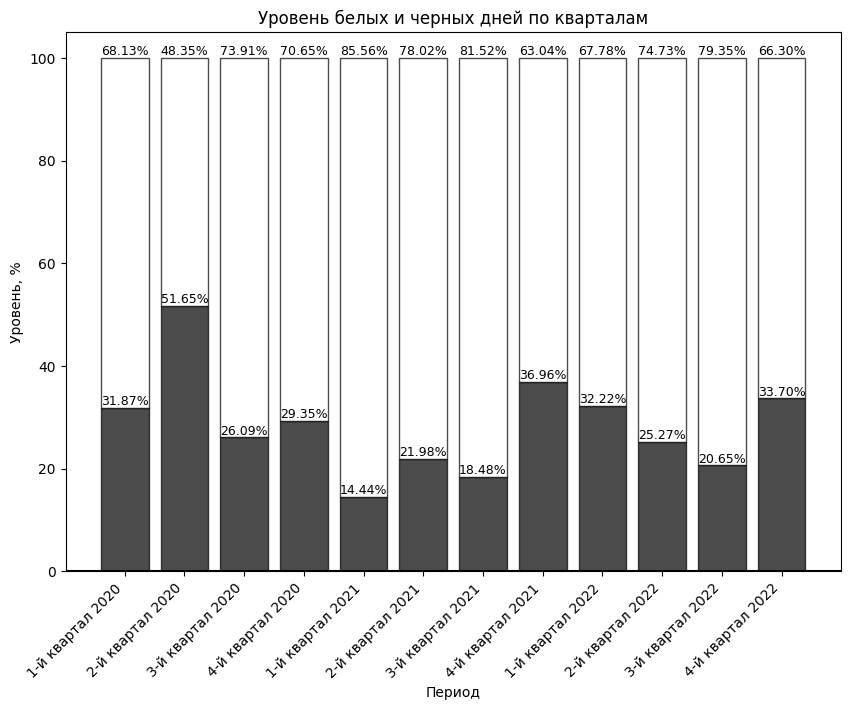

In [40]:
title = 'Уровень белых и черных дней по кварталам'
BW_level_plot(quarters_level_df, title)

# Задание 4



### 1. Работа с данными




#### 1.1 Агрегирование данных по годам


Выбрать временные интервалы:

"2020-й год" - с 01 января по 31 декабря;

"2021-й год" - с 01 января по 31 декабря;

"2022-й год" - с 01 января по 31 декабря;

Определить уровни белых и черных дней (по аналогии с базовым уровнем) по годам.

In [41]:
df = data_load()
df = data_shape(df, '2020-01-01', '2022-12-31')
df = day_cat(df)

df['Период'] = np.where((df['Time'].dt.year == 2020), '2020-й год',
                    np.where((df['Time'].dt.year == 2021), '2021-й год', '2022-й год'))


In [42]:
df['Период'].value_counts()

Период
2020-й год    366
2021-й год    365
2022-й год    365
Name: count, dtype: int64

In [43]:
years = ['2020-й год', '2021-й год', '2022-й год']
year_levels_df = BW_level(df, years, BaseLevel)
year_levels_df

,Период,Уровень белых дней,Уровень черных дней,Отклонение от BL White,Отклонение от BL Black
0,2020-й год,65.300546,34.699454,-5.725095,5.725095
1,2021-й год,76.986301,23.013699,5.960660,-5.960660
2,2022-й год,72.054795,27.945205,1.029153,-1.029153


#### 1.2 Агрегирование сезонных данных со сдвигом


Выбрать временные интервалы (как в сезонах, но весна начинается сне с 01 марта, а с 07 марта): 

"Весна 2020" - с 07 марта; "Весна 2021"; "Весна 2022";

"Лето 2020"; "Лето 2021"; "Лето 2022";

"Осень 2020"; "Осень 2021"; "Осень 2022";

"Зима 2021"; "Зима 2022";"Зима 2023";

Определить уровни белых и черных дней по временам года в каждом году.

In [44]:
df = data_load()
df = data_shape(df, '2020-03-07', '2023-03-07')
df = day_cat(df)

Делаю сдвиг с помощью метода Timedelta, тогда все даты двигаются на нужное количество дней, и можно использовать метод, используемый для определения сезонов выше.

In [45]:
df['Time_shift'] = df['Time'] - pd.Timedelta('6 days')

In [46]:
df = season_label(df, 'Time_shift')

In [47]:
df

,Time,Var1,Категория дня,Time_shift,Период
77,2020-03-07,0.574958,White,2020-03-01,Весна 2020
78,2020-03-08,0.452027,Black,2020-03-02,Весна 2020
79,2020-03-09,0.616914,Black,2020-03-03,Весна 2020
80,2020-03-10,0.452903,Black,2020-03-04,Весна 2020
81,2020-03-11,0.522560,White,2020-03-05,Весна 2020
...,...,...,...,...,...
1166,2023-03-01,0.456620,Black,2023-02-23,Зима 2023
1167,2023-03-02,0.550202,White,2023-02-24,Зима 2023
1168,2023-03-03,0.472124,Black,2023-02-25,Зима 2023
1169,2023-03-04,0.575550,White,2023-02-26,Зима 2023


In [48]:
df['Период'].value_counts()

Период
Весна 2020    92
Лето 2020     92
Весна 2021    92
Лето 2021     92
Весна 2022    92
Лето 2022     92
Осень 2020    91
Осень 2021    91
Осень 2022    91
Зима 2021     90
Зима 2022     90
Зима 2023     89
Name: count, dtype: int64

In [49]:
df['Категория дня'].value_counts()

Категория дня
White    781
Black    313
Name: count, dtype: int64

In [50]:
seasons = ['Весна 2020', 'Лето 2020', 'Осень 2020',
           'Зима 2021', 'Весна 2021', 'Лето 2021', 'Осень 2021',
           'Зима 2022', 'Весна 2022', 'Лето 2022', 'Осень 2022', 
           'Зима 2023'
           ]

season_levels_df = BW_level(df, seasons, BaseLevel)
season_levels_df

,Период,Уровень белых дней,Уровень черных дней,Отклонение от BL White,Отклонение от BL Black
0,Весна 2020,50.000000,50.000000,-21.025641,21.025641
1,Лето 2020,70.652174,29.347826,-0.373467,0.373467
2,Осень 2020,69.230769,30.769231,-1.794872,1.794872
3,Зима 2021,82.222222,17.777778,11.196581,-11.196581
4,Весна 2021,82.608696,17.391304,11.583055,-11.583055
5,Лето 2021,80.434783,19.565217,9.409142,-9.409142
6,Осень 2021,64.835165,35.164835,-6.190476,6.190476
7,Зима 2022,68.888889,31.111111,-2.136752,2.136752
8,Весна 2022,72.826087,27.173913,1.800446,-1.800446
9,Лето 2022,79.347826,20.652174,8.322185,-8.322185


### 2. Визуализация



#### 2.1 Визуализация агрегированных данных по годам


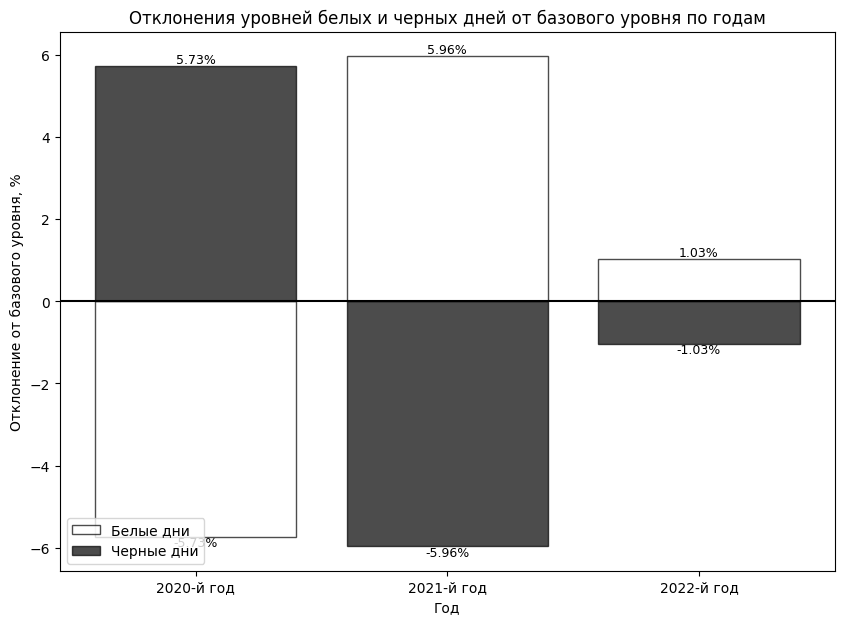

In [51]:
xlabel = 'Год'
title = 'Отклонения уровней белых и черных дней от базового уровня по годам'

diff_diagram(year_levels_df, xlabel, title)


#### 2.2 Визуализация агрегированных сезонных данных со сдвигом


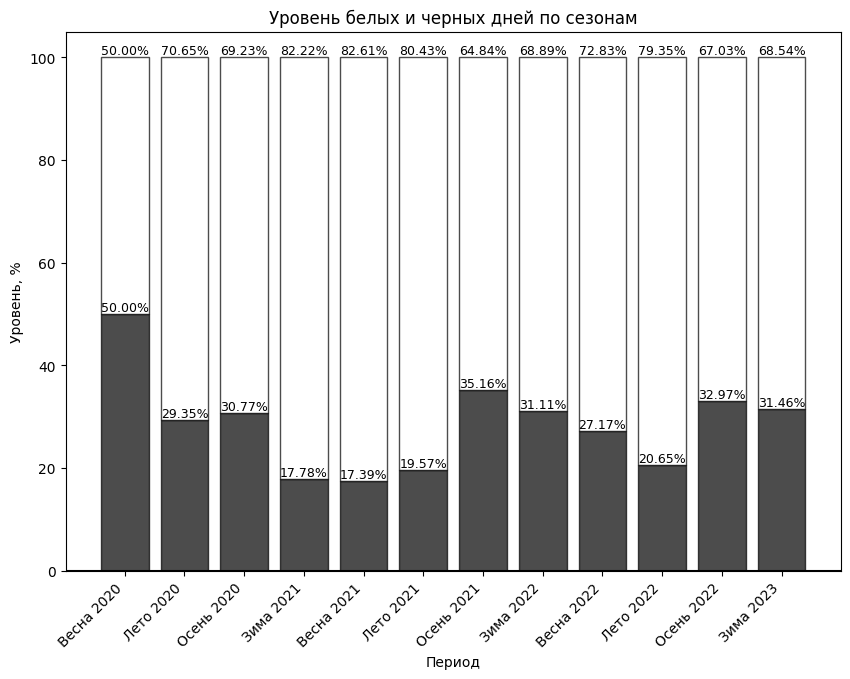

In [52]:
title = 'Уровень белых и черных дней по сезонам'
BW_level_plot(season_levels_df, title)

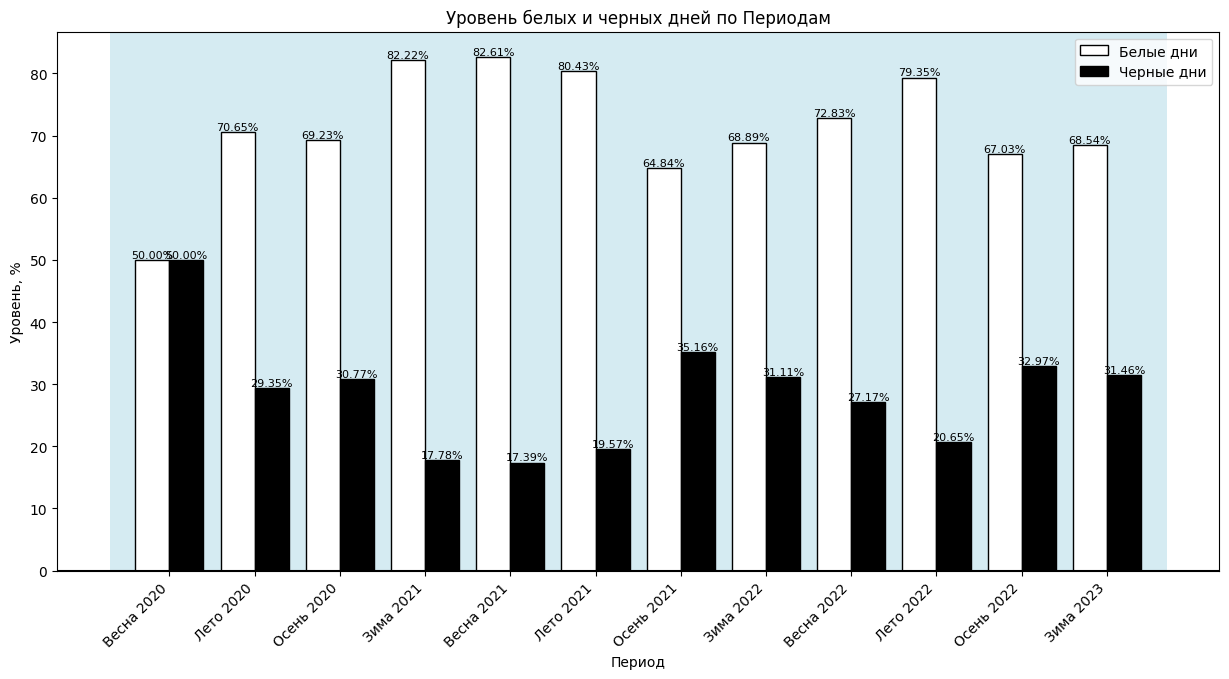

In [53]:
plt.figure(figsize=(15, 7))

bar_width = 0.4
bar_positions1 = np.arange(len(season_levels_df['Период']))
bar_positions2 = bar_positions1 + bar_width

plt.axvspan(bar_positions1[0] - 0.5, bar_positions2[-1] + 0.5, facecolor='lightblue', alpha=0.5)

bar1 = plt.bar(bar_positions1, season_levels_df['Уровень белых дней'], width=bar_width, color='white', edgecolor='black', label='Белые дни')
bar2 = plt.bar(bar_positions2, season_levels_df['Уровень черных дней'], width=bar_width, color='black', edgecolor='black', label='Черные дни')

for i, (val1, val2) in enumerate(zip(season_levels_df['Уровень белых дней'], season_levels_df['Уровень черных дней'])):
    plt.text(bar_positions1[i], val1, f"{val1:.2f}%", ha='center', va='bottom' if val1 >= 0 else 'top', fontsize=8, color='black')
    plt.text(bar_positions2[i], val2, f"{val2:.2f}%", ha='center', va='bottom' if val2 >= 0 else 'top', fontsize=8, color='black')

plt.axhline(y=0, color='black')
plt.xlabel('Период')
plt.ylabel('Уровень, %')
plt.title('Уровень белых и черных дней по Периодам')
plt.xticks((bar_positions1 + bar_positions2) / 2, season_levels_df['Период'])
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()


### 3. Анализ диаграмм

По графику видно, что весной и летом происходит наибольший рост белых дней, и уменьшение черных. Осенью и зимой рост также наблюдается, но он меньше. 

В 2020 году произошел резкий сдвиг в сторону увеличения черных дней. Далее наблюдается положительная динамика роста белых дней, и уменьшения черных. 

Также заметны сезонные колебания, летом уровень белых дней выше, чем в другие сезоны. Осенью наблюдается снижение уровня белых дней.

Весной 2021 самый высокий уровень белых дней. Летом 2021 и 2022 одинаковый уровень белых и черных дней.

Можно сказать, что присутствует некая устойчивость в динамике изменения данных. Наверное, не имея контекста сказать что-либо еще по этим графикам сложно.

# Задание 5

### 1. Моделирование типичного свойства данных



#### 1.1 Равномерное агрегирование по времени



На всем наборе данных с 2019-12-21 по 2023-03-04 построить агрегированную по времени модель с параметрами   и   на всем наборе данных.

Всего в наборе данных 1170 дней. Для интервала в 90 дней получаем 1170 / 90 = 13, т.е. в наборе данных будет 13 интервалов по 90 дней.

Построить модель - разбить весь период наблюдений на интервалы по 90 дней и посчитать уровень белого и черного на каждом интервале.

In [54]:
df = data_load()
df = data_shape(df, '2019-12-21', '2023-03-04')
df = day_cat(df)

In [55]:
df

,Time,Var1,Категория дня
0,2019-12-21,0.543378,White
1,2019-12-22,0.504853,White
2,2019-12-23,0.430356,Black
3,2019-12-24,0.527782,White
4,2019-12-25,0.497517,Black
...,...,...,...
1165,2023-02-28,0.479268,Black
1166,2023-03-01,0.456620,Black
1167,2023-03-02,0.550202,White
1168,2023-03-03,0.472124,Black


In [56]:
df['Период'] = (df['Time'].sub(df['Time'].min()) // pd.Timedelta('90 days')).add(1)
df


,Time,Var1,Категория дня,Период
0,2019-12-21,0.543378,White,1
1,2019-12-22,0.504853,White,1
2,2019-12-23,0.430356,Black,1
3,2019-12-24,0.527782,White,1
4,2019-12-25,0.497517,Black,1
...,...,...,...,...
1165,2023-02-28,0.479268,Black,13
1166,2023-03-01,0.456620,Black,13
1167,2023-03-02,0.550202,White,13
1168,2023-03-03,0.472124,Black,13


In [57]:
periods = df['Период'].unique()
result_df = BW_level(df, periods, BaseLevel)
result_df

,Период,Уровень белых дней,Уровень черных дней,Отклонение от BL White,Отклонение от BL Black
0,1,64.444444,35.555556,-6.581197,6.581197
1,2,48.888889,51.111111,-22.136752,22.136752
2,3,74.444444,25.555556,3.418803,-3.418803
3,4,67.777778,32.222222,-3.247863,3.247863
4,5,84.444444,15.555556,13.418803,-13.418803
5,6,78.888889,21.111111,7.863248,-7.863248
6,7,83.333333,16.666667,12.307692,-12.307692
7,8,63.333333,36.666667,-7.692308,7.692308
8,9,68.888889,31.111111,-2.136752,2.136752
9,10,73.333333,26.666667,2.307692,-2.307692


1.2 Оценка соответствия модели данным
Оценить соответствие полученной модели данным по формуле $$err = ||\frac{1}{k} * \sum_{i=1}^{k}(BW_{i}-BL)||$$


In [58]:
def err(result_df, BaseLevel):
    err = np.linalg.norm((np.sum([(bw - BaseLevel[0]) for bw in result_df['Уровень белых дней']]) / len(result_df)))
    return err


In [59]:
err(result_df, BaseLevel)

2.1862853408003084e-15

#### 1.2 Визуализация

Наглядно отобразить на столбчатой диаграмме (bar) уровни белых и черных дней.

Добавить обозначения, заголовок и подписи для осей.

по x оси: 'Выборки по T-интервалам на всем наборе данных' 

по y оси: 'Уровни белого и черного в (%)'

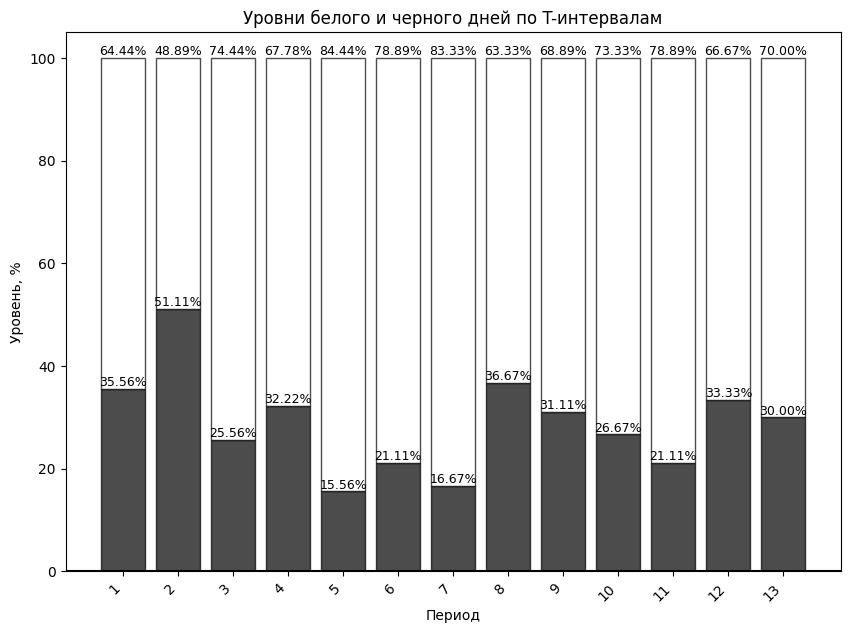

In [60]:
title = 'Уровни белого и черного дней по T-интервалам'
BW_level_plot(result_df, title)

# Задание 6

### 1. Моделирование типичного свойства данных

#### 1.1 Равномерное агрегирование по времени

Задача А: для равномерно агрегированной модели из 13-ти столбиков по 90 дней каждый определить
уровень белого и черного BW всей модели на всем наборе данных.

In [61]:
df = data_load()
df = data_shape(df, '2019-12-21', '2023-03-04')

In [62]:
df['Период'] = (df['Time'].sub(df['Time'].min()) // pd.Timedelta('90 days')).add(1)

In [63]:
BL = BaseLevel
BL

[71.02564102564102, 28.974358974358974]

In [64]:
BW_df = pd.DataFrame()
BW_df['Период'] = result_df['Период']
BW_df['BW'] = result_df.apply(lambda row: [row['Уровень белых дней'], row['Уровень черных дней']], axis=1)
BW_df

,Период,BW
0,1,"[64.44444444444444, 35.55555555555556]"
1,2,"[48.888888888888886, 51.11111111111111]"
2,3,"[74.44444444444444, 25.555555555555554]"
3,4,"[67.77777777777779, 32.22222222222222]"
4,5,"[84.44444444444444, 15.555555555555555]"
5,6,"[78.88888888888889, 21.11111111111111]"
6,7,"[83.33333333333334, 16.666666666666664]"
7,8,"[63.33333333333333, 36.666666666666664]"
8,9,"[68.88888888888889, 31.11111111111111]"
9,10,"[73.33333333333333, 26.666666666666668]"


#### 1.2 Оценка соответствия модели данным

Задача Б: для равномерно агрегированной модели из 13-ти столбиков по 90 дней каждый вычислить ошибку соответсвия этой модели данным.

In [65]:
BW_df['fit_error'] = BW_df.apply(lambda row: np.linalg.norm([row['BW'][0] - BL[0], row['BW'][1] - BL[1]]), axis=1)
BW_df

,Период,BW,fit_error
0,1,"[64.44444444444444, 35.55555555555556]",9.307217
1,2,"[48.888888888888886, 51.11111111111111]",31.306095
2,3,"[74.44444444444444, 25.555555555555554]",4.834918
3,4,"[67.77777777777779, 32.22222222222222]",4.593172
4,5,"[84.44444444444444, 15.555555555555555]",18.977054
5,6,"[78.88888888888889, 21.11111111111111]",11.120312
6,7,"[83.33333333333334, 16.666666666666664]",17.405705
7,8,"[63.33333333333333, 36.666666666666664]",10.878566
8,9,"[68.88888888888889, 31.11111111111111]",3.021824
9,10,"[73.33333333333333, 26.666666666666668]",3.263570


In [66]:
sum(BW_df['fit_error'])/13

10.264903174621281

#### 1.3 Параметризация равномерно агрегированной модели

In [67]:
def shift_model(df, l):
    df['Период'] = np.roll(df['Период'], l)
    # df = pd.concat([df.iloc[l:], df.iloc[:l]], ignore_index=True)
    if l > 0:
        df.loc[:l-1, 'Период'] = 1
    elif l == 0:
      return df
    else:
      df.iloc[l:, df.columns.get_loc('Период')] = 13
    return df


In [68]:
df = data_load()
df = data_shape(df, '2019-12-21', '2023-03-04')
df['Период'] = (df['Time'].sub(df['Time'].min()) // pd.Timedelta('90 days')).add(1)

In [69]:
df = shift_model(df, 1)

In [70]:
df['Период'].value_counts()

Период
1     91
2     90
3     90
4     90
5     90
6     90
7     90
8     90
9     90
10    90
11    90
12    90
13    89
Name: count, dtype: int64

In [71]:
df = shift_model(df, -2)

In [72]:
df['Период'].value_counts()

Период
13    91
2     90
3     90
4     90
5     90
6     90
7     90
8     90
9     90
10    90
11    90
12    90
1     89
Name: count, dtype: int64

#### 1.4 Сдвиг равномерно-агрегированной модели по параметру l

Задача В: для моделей с параметрами l = 1 и l = -1 определить уровени белого и черного BW для каждой модели на всем наборе данных; вычислить ошибку соответсвия модели данным при l = 1 и при l = -1; вычислить ошибку соответсвия модели данным при l = 0 и сравнить с ответом Задачи Б.

In [73]:
def model_with_shift(l):
    df = data_load()
    df = data_shape(df, '2019-12-21', '2023-03-04')
    df = day_cat(df)
    df['Период'] = (df['Time'].sub(df['Time'].min()) // pd.Timedelta('90 days')).add(1)
    df = shift_model(df, l)
    return df

In [74]:
def BW_fit_error(df):
    periods = df['Период'].unique()
    result_df = BW_level(df, periods, BaseLevel)
    result_df['BW'] = result_df.apply(lambda row: [row['Уровень белых дней'], row['Уровень черных дней']], axis=1)
    result_df['fit_error'] = result_df.apply(lambda row: np.linalg.norm([row['Уровень белых дней'] - BL[0], row['Уровень черных дней'] - BL[1]]), axis=1)
    result_df = result_df.drop(['Уровень белых дней', 'Уровень черных дней', 'Отклонение от BL White', 'Отклонение от BL Black'], axis=1)
    return result_df

In [75]:
df0 = model_with_shift(0)
result_df0 = BW_fit_error(df0)
result_df0

,Период,BW,fit_error
0,1,"[64.44444444444444, 35.55555555555556]",9.307217
1,2,"[48.888888888888886, 51.11111111111111]",31.306095
2,3,"[74.44444444444444, 25.555555555555554]",4.834918
3,4,"[67.77777777777779, 32.22222222222222]",4.593172
4,5,"[84.44444444444444, 15.555555555555555]",18.977054
5,6,"[78.88888888888889, 21.11111111111111]",11.120312
6,7,"[83.33333333333334, 16.666666666666664]",17.405705
7,8,"[63.33333333333333, 36.666666666666664]",10.878566
8,9,"[68.88888888888889, 31.11111111111111]",3.021824
9,10,"[73.33333333333333, 26.666666666666668]",3.263570


In [76]:
df1 = model_with_shift(1)
result_df1 = BW_fit_error(df1)
result_df1

,Период,BW,fit_error
0,1,"[64.83516483516483, 35.16483516483517]",8.754655
1,2,"[48.888888888888886, 51.11111111111111]",31.306095
2,3,"[74.44444444444444, 25.555555555555554]",4.834918
3,4,"[67.77777777777779, 32.22222222222222]",4.593172
4,5,"[84.44444444444444, 15.555555555555555]",18.977054
5,6,"[78.88888888888889, 21.11111111111111]",11.120312
6,7,"[83.33333333333334, 16.666666666666664]",17.405705
7,8,"[62.22222222222222, 37.77777777777778]",12.449914
8,9,"[70.0, 30.0]",1.450475
9,10,"[73.33333333333333, 26.666666666666668]",3.263570


In [77]:
df_1 = model_with_shift(-1)
result_df_1 = BW_fit_error(df_1)
result_df_1

,Период,BW,fit_error
0,1,"[64.04494382022472, 35.95505617977528]",9.872197
1,2,"[50.0, 50.0]",29.734747
2,3,"[73.33333333333333, 26.666666666666668]",3.263570
3,4,"[67.77777777777779, 32.22222222222222]",4.593172
4,5,"[84.44444444444444, 15.555555555555555]",18.977054
5,6,"[80.0, 20.0]",12.691660
6,7,"[82.22222222222221, 17.77777777777778]",15.834357
7,8,"[63.33333333333333, 36.666666666666664]",10.878566
8,9,"[70.0, 30.0]",1.450475
9,10,"[72.22222222222221, 27.77777777777778]",1.692221


### 2.2 Визуализация результатов

#### 2.1 Создание таблицы со значениями ошибки соответствия данным

In [78]:
def FE_table(list):
    model = []
    fit_error = []
    for l in list:
        model.append('i = ' + str(l))
        s = BW_fit_error(model_with_shift(l))['fit_error']
        fit_error.append(sum(s)/len(s))

    FE = pd.DataFrame({
        'Model': model,
        'Fit-error': fit_error
        })
    return FE
    

In [79]:
FE_table([-1, 0, 1])

,Model,Fit-error
0,i = -1,10.029426
1,i = 0,10.264903
2,i = 1,10.259068


#### 2.2 Построение диаграмм

In [80]:
def plot_shift(result_df, l):
    bar_width = 0.4
    bar_positions1 = result_df['Период'].values
    bar_positions2 = bar_positions1 + bar_width

    fig, ax = plt.subplots(figsize=(16, 6))
    bar1 = ax.bar(bar_positions1, [val[0] for val in result_df['BW']], width=bar_width, color='white', edgecolor='black', label='Белые дни')
    bar2 = ax.bar(bar_positions2, [val[1] for val in result_df['BW']], width=bar_width, color='black', edgecolor='black', label='Черные дни')

    for i, (bw_values, period) in enumerate(zip(result_df['BW'], result_df['Период'])):
        ax.text(bar_positions1[i], bw_values[0] + 1, f'{bw_values[0]:.2f}', ha='center', va='bottom', fontsize=7)
        ax.text(bar_positions2[i], bw_values[1] + 1, f'{bw_values[1]:.2f}', ha='center', va='bottom', fontsize=7)

    ax.set_xticks(bar_positions1 + bar_width / 2)
    ax.set_xticklabels(result_df['Период'])
    ax.legend()

    # Добавление подписей осей и заголовка
    ax.set_xlabel('Паттерн модели с параметром сдвига l = ' + str(l))
    ax.set_ylabel('Уровени белого и черного в (%)')

    plt.show()

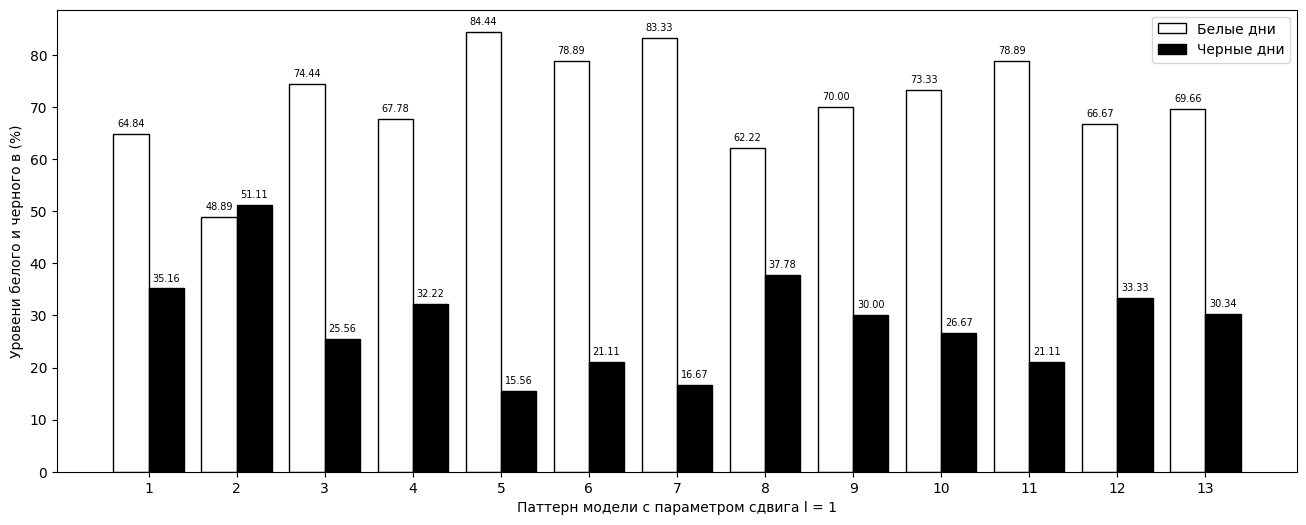

In [81]:
plot_shift(result_df1, 1)

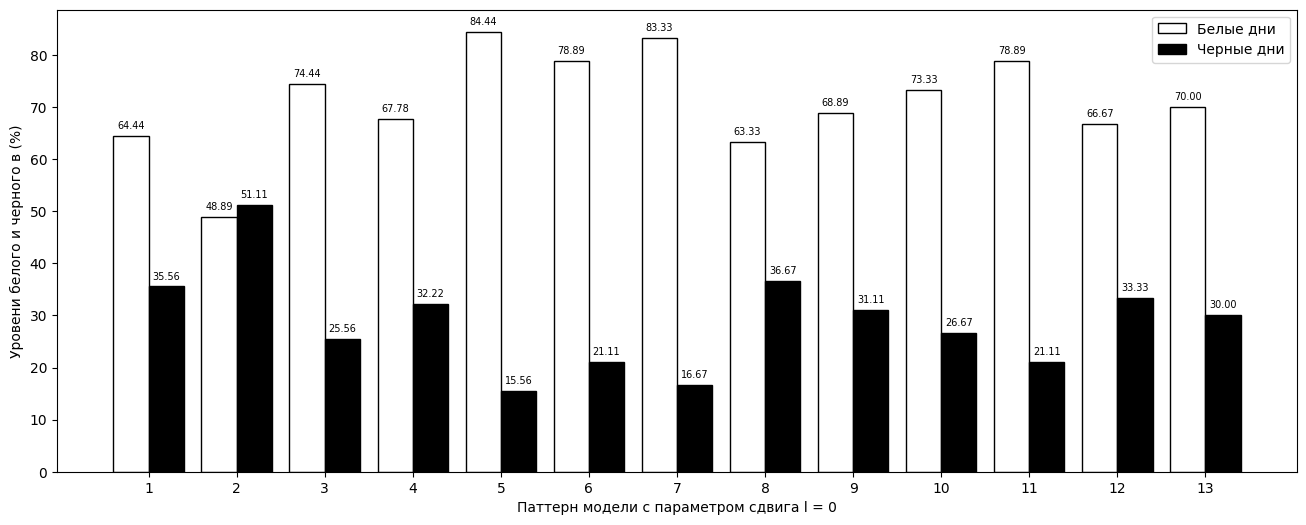

In [82]:
plot_shift(result_df0, 0)

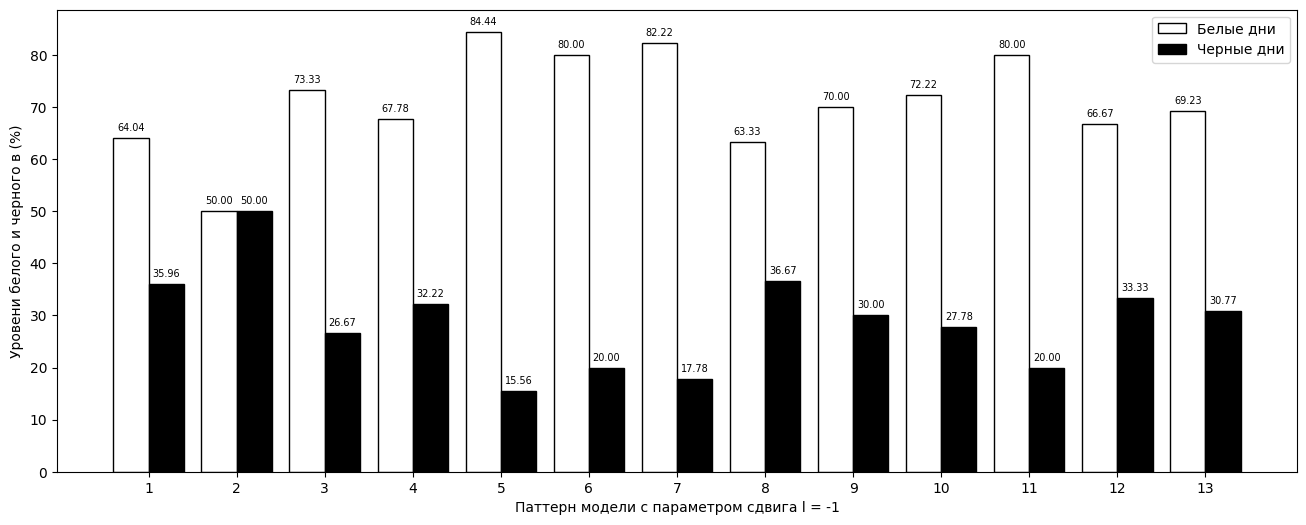

In [83]:
plot_shift(result_df_1, -1)